<a href="https://colab.research.google.com/github/forfourr/Pre-cap/blob/main/file_storage_blob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Storage



> Azure Storage Account

- 비정형 및 반정형 데이터 저장소
- 뛰어난 내구성, 가용성
- 제한 없는 저장소 용량
- 손쉬운 엑세스
- 높은 성능
- Blob(Oject storage), Files(file shares), Table(key-value storage), Queue(Simple queue)



In [ ]:
!pip install azure-storage-blob azure-identity

In [ ]:
import os, uuid
from azure.identity import DefaultAzureCredential
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient

In [ ]:
#connection string으로 blob서비스에 접속속
connect_str='DefaultEndpointsProtocol=https;AccountName=labuser62;AccountKey=K4l8YcEsV/tAAOCafYU3WrtNnWlBY9Wo7X5KpYR4ZOA07tB0ScyUJZ5s8XlZbbsrpPbCSoUBxuW4+ASthXXVUA==;EndpointSuffix=core.windows.net'

In [ ]:
#Blob service 자체 만들기기
blob_service_client = BlobServiceClient.from_connection_string(connect_str)    #연결해봐

In [ ]:
#container 만들기
container_name ='test2container'  #naming
container_client = blob_service_client.create_container(container_name)

In [ ]:
#create a local directory to hold blob data
local_path = './data'      #os로 경로 설정
os.mkdir(local_path)       #directory  설정

#create a file in a local data directory to upload
local_file_name = 'welcome' + '.txt'                            #파일이름
upload_file_path = os.path.join(local_path, local_file_name)    #경로와 파일 합쳐줌-> 파일의전체 경로

#write text to the file
file = open(upload_file_path, mode ='w')    #Write모드(쓰기)로 열것이다. 없으면 생성되서 열것이다
file.write('welcome to my place~!')
file.close()




In [ ]:
blob_client = blob_service_client.get_blob_client(
                  container=container_name, blob=local_file_name)

with open(file=upload_file_path, mode='rb') as data:
  blob_client.upload_blob(data)

In [ ]:
#Check blob file list
print('\nListing blobs')
blob_list = container_client.list_blobs()

#print list
for blob in blob_list:
    print('\t'+blob.name)

In [ ]:
#Download the blob to a loacal file in colab
#check if it's possible to download
#Add ' DOWNLOAD' before .txt entendsion -> see both files in data direction

#make download file direct
download_file_path = os.path.join(local_path,           #local path에는 data폴더 지정되어 있음
                                  str.replace(local_file_name,'.txt','_DOWNLOAD.txt'))     #local_file_name.txt를 'DOWNLOAD.txt'로 바꿔줘
#local_file_name이 기존 파일이름과 같으니까 덮어쓰기가 됨-> 그래서 바뀌준다
print(download_file_path)

In [ ]:
#blob에서 container로 정보 가져옴
container_client = blob_service_client.get_container_client(container=container_name)

#blob container에 있는걸 가져와서 쓰기
with open(file = download_file_path, mode='wb') as download_file:   #왔다갔다하는 내용 rb, 다운받아서 사용 wb
    download_file.write(container_client.download_blob(blob.name).readall())         
    #blob컨테이너(cloud)에 있는 내용 다운, blob이름으로 가져옴
    #통째로 읽어서 쓰기

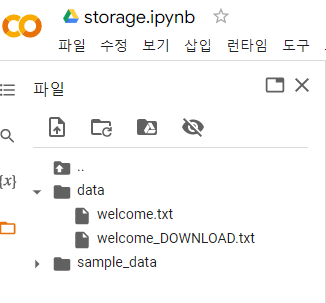

^ welcome_DOWLOAD.txt 파일 생성됨

In [ ]:
#Clean up
print('\n Press the Enter Key to begin clean up')
input()

print('Deleting blob container ...')
container_client.delete_container()

#파일 지우기
print('Deleteing the local source and donwload fiels...')
os.remove(upload_file_path)
os.remove(download_file_path)
os.rmdir(local_path)       #dict지우기

print('done')